In [1]:
import requests 
import json
import pandas as pd 
from pandas import DataFrame
import geopandas as gpd
from matplotlib import artist
import matplotlib.pyplot as plt
import contextily as ctx

In [31]:
url = 'http://localhost:8000/observation/wp_observation/'
session = requests.Session()
params = {}
params["category_uuid"] = "17218360-6c42-4f19-9637-1d7c8fc20802"
params["category_uuid"] = "ee72fc4d-c0b1-4dc1-9baf-a2b517ae9567"
params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["start_date"] = "2022-01-01T00:00:00"
params["end_date"] = "2023-06-02T00:00:01"
params["limit"] = 20

<h1>Loads all observation of a patrol</h1>

In [41]:
url = 'http://localhost:8000/observation/patrolobservations/'
session = requests.Session()
params = {}
params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["patrol_uuid"] = "2656e62f-c64a-4f7a-a5d3-50f317bc6784"
#params["patrol_id"] = "LIONSNA_000500"
#params["limit"] = 2

<h1>Load List of patrols</h1>

In [71]:
url = 'http://localhost:8000/patrol/getlist/'
session = requests.Session()
params = {}
#params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["start_date"] = "2023-01-01T00:00:00"
params["end_date"] = "2023-01-01T00:00:00"
params["limit"] = 200

<h1>Load Patrol with Observations and Track</h1>

In [3]:
url = 'http://localhost:8000/patrol/getlist/'
session = requests.Session()
params = {}
#params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["start_date"] = "2023-01-01T00:00:00"
params["end_date"] = "2023-01-01T00:00:00"
params["limit"] = None

In [4]:
url = 'http://localhost:8000/patrol/9ac74ab2-c5d7-4250-899a-a7bb2ae26c70'
session = requests.Session()
params = {}
#params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
#params["start_date"] = "2023-01-01T00:00:00"
#params["end_date"] = "2023-01-01T00:00:00"
#params["limit"] = 2

In [21]:
r = session.get(url, verify=False, params=params) 
print(r.status_code)
j = json.loads(r.content)
print(json.dumps(j, indent=2))

500


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [25]:
gdf = gpd.GeoDataFrame.from_features(j)
#print(gdf.columns)
#print(gdf.info)
print(gdf.uuid)

TypeError: string indices must be integers, not 'str'

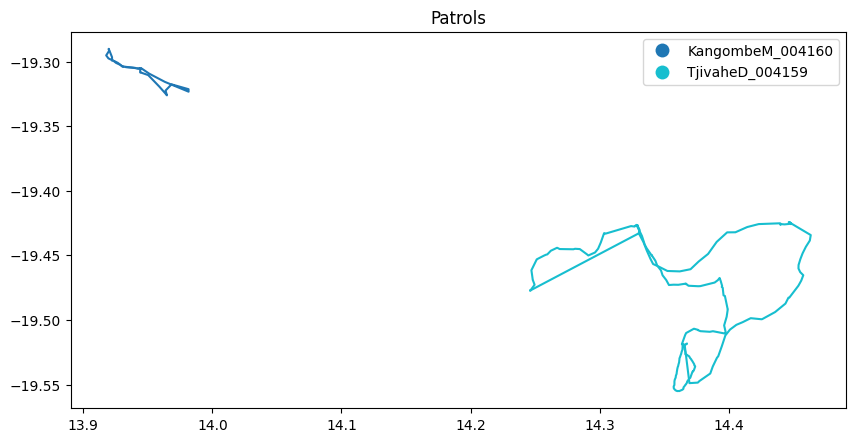

In [124]:
myplot = gdf.plot(legend=True,
                      #column="Number of People", 
                      #column="category",
                      column="id",

                      figsize=(10, 8))
    
myplot.set_picker(True)
myplot.set_mouseover(True)
#a = artist.Artist()

#myplot.set_axis_off()
#ctx.add_basemap(ax=myplot, source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)  # I'm using OSM as the source. See all provides with ctx.providers
plt.title("Patrols")
plt.magma()
plt.ion()
plt.show(block=True)
